# Data Analyst Job Market Analysis

## Motivation
As a 3D artist with an informatics background, I analyze 
the data analyst job market to evaluate a possible career switch 
from 3D artist to data analyst.

## Part 1: USA Market Deep Dive
#### 1.1 Dataset Overview
#### 1.2 Data Cleaning 
#### 1.2.1 Salary Estimate in Min, Max and Middle Salary
#### 1.3 Salary Analysis
#### 1.3.1 Best 10 Cities
#### 1.3.2 Worst 10 Cities
#### 1.3.3 Compare the best and the worst cities in the USA
#### 1.4 Skills Requirements
#### 1.5 Geographic Distribution
#### 1.6 Industry Breakdown

## Part 2: Germany Market Insights
#### 2.1 Data Collection Methodology
#### "Daten manuell erhoben via StepStone, Indeed (Januar 2026)"
#### 2.2 Salary Comparison (USA vs Germany)
#### 2.3 Job Availability

## Part 3: Career Switch Analysis
#### 3.1 3D Artist vs Data Analyst (Germany)
#### 3.2 Transferable Skills
#### 3.3 Conclusions & Next Steps
#### _______________________________________________________________________________________________________

## Part 1: USA Market Deep Dive
### 1.1 Dataset Overview

In [305]:
import pandas as pd
import numpy as np

# 1. USA-Daten (dein Kaggle Dataset)
df_usa = pd.read_csv('data/DataAnalyst.csv',delimiter=',')

df_usa.head()



,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


### 1.2 Data Cleaning 
#### 1.2.1 Salary Estimate in Min, Max and Middle Salary

In [ ]:
df_usa_cleaned = df_usa.copy()

df_usa_cleaned['Salary Estimate']

#----------------- Clear Slary Estimate -----------------------------------------------------------------------------

# for sep in ["K", "$", ","]:
#     df_usa_cleaned['Salary Estimate'] = df_usa_cleaned['Salary Estimate'].replace(sep, " ")
# Cleara the Sybmols 'K', '$' and '-'
df_usa_cleaned['Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.replace('K', ' ')
df_usa_cleaned['Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.replace('$', ' ')
df_usa_cleaned['Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.replace('-', '')

# Split the Min Salary Estimate and Max Salary Estimate 
df_usa_cleaned['Min Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.split(' ').str[1]
df_usa_cleaned['Max Salary Estimate'] = df_usa_cleaned['Salary Estimate'].str.split(' ').str[3]

# The Null Values from the Min Salary Estimate and Max Salary Estimate, 
# will be settet to the middle Values of the collum
Min_Salary_middle_Value = df_usa_cleaned['Min Salary Estimate'].mode()[0]
df_usa_cleaned.loc[df_usa_cleaned['Min Salary Estimate'].isnull(), 'Min Salary Estimate' ] = Min_Salary_middle_Value

Min_Salary_middle_Value = df_usa_cleaned['Max Salary Estimate'].mode()[0]
df_usa_cleaned.loc[df_usa_cleaned['Max Salary Estimate'].isnull(), 'Max Salary Estimate' ] = Min_Salary_middle_Value

# #df_usa_cleaned.loc[[2149]]
df_usa_cleaned.drop('Salary Estimate', axis=1, inplace=True)
# df_usa_cleaned.drop(df_usa_cleaned[df_usa_cleaned['Min Salary Estimate'].isnull()], axis=1, inplace=True)  

# Set the type of the collums to int
# Multyply by 1000 becose of the K in the original Salary Estimate
df_usa_cleaned['Min Salary Estimate'] = df_usa_cleaned['Min Salary Estimate'].astype(int) * 1000
df_usa_cleaned['Max Salary Estimate'] = df_usa_cleaned['Max Salary Estimate'].astype(int) * 1000

# Calculate the Aqvarage Salary
df_usa_cleaned['Average Salary Estimate'] = (df_usa_cleaned['Min Salary Estimate'] + df_usa_cleaned['Max Salary Estimate'] ) / 2  



#----------------- Clear Location -----------------------------------------------------------------------------

# Stadt extrahieren (vor dem Komma)
df_usa_cleaned['City'] = df_usa_cleaned['Location'].str.split(',').str[0].str.strip()

# State extrahieren (nach dem Komma)
df_usa_cleaned['State'] = df_usa_cleaned['Location'].str.split(',').str[1].str.strip()

# Converrt to String
# df_usa_cleaned['City'] = df_usa_cleaned['City'].astype('string')
# df_usa_cleaned['State'] = df_usa_cleaned['State'].astype('string')

# Delewte the Location Collum
df_usa_cleaned.drop('Location', axis=1, inplace=True)
df_usa_cleaned.info()

# Prüfen
# print("\nBeispiele:")
# print(df_usa_cleaned[['Location', 'City', 'State']].head(10))


# df_usa_cleaned.info()
df_usa_cleaned.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2253 non-null   int64  
 1   Job Title                2253 non-null   object 
 2   Job Description          2253 non-null   object 
 3   Rating                   2253 non-null   float64
 4   Company Name             2252 non-null   object 
 5   Headquarters             2253 non-null   object 
 6   Size                     2253 non-null   object 
 7   Founded                  2253 non-null   int64  
 8   Type of ownership        2253 non-null   object 
 9   Industry                 2253 non-null   object 
 10  Sector                   2253 non-null   object 
 11  Revenue                  2253 non-null   object 
 12  Competitors              2253 non-null   object 
 13  Easy Apply               2253 non-null   object 
 14  Min Salary Estimate     

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Min Salary Estimate,Max Salary Estimate,Average Salary Estimate,City,State
0,0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,37000,66000,51500.0,New York,NY


#### 1.3 Salary Analysis

In [86]:
# Gehälter:
# Top 10 bestbezahlte Städte

# Durchschnittsgehalt pro Stadt berechnen
# **Beispiel:**
# groupby() :
# Vorher (einzelne Zeilen):              # Nachher (gruppiert):
# Job 1: New York, $70,000               # New York: [$70,000, $80,000, $90,000]
# Job 4: Boston, $75,000                 # Boston: [$65,000, $75,000]
# Job 5: New York, $90,000

# agg() :                                      
# - Nimm die Spalte `'Max Salary Estimate'`   # New York: [$70,000, $80,000, $90,000]               # Boston: [$65,000, $75,000]
# - Berechne **zwei Sachen**:                 #   → mean = (70000 + 80000 + 90000) / 3 = $80,000    #   → mean = (65000 + 75000) / 2 = $70,000
#   - `'mean'` = Durchschnitt                 #   → count = 3 Jobs                                  #   → count = 2 Jobs
#   - `'count'` = Wie viele Jobs

city_salary = df_usa_cleaned.groupby('City').agg({
    'Average Salary Estimate': ['mean', 'count']
}).round(0)

# Nur Städte mit mindestens 5 Jobs berücksichtigen
# Rename Columns
city_salary.columns = ['Avg_Salary', 'Job_Count']
# Add the cities with min 5 Jobs
city_salary = city_salary[city_salary['Job_Count'] >= 5]
#Sort the highter Salary first  
city_salary = city_salary.sort_values('Avg_Salary', ascending=False)

# Save the first 10 Citys with top salarys
top_10_cities = city_salary.head(10)

# Print TOP 10
print("\n" + "="*80)
print("TOP 10 BESTBEZAHLTE STÄDTE (min. 5 Jobs):")
print("="*80)
print(top_10_cities)




TOP 10 BESTBEZAHLTE STÄDTE (min. 5 Jobs):
               Avg_Salary  Job_Count
City                                
San Jose         108855.0         38
Cupertino        105885.0         13
Santa Clara      104636.0         22
Sunnyvale        102781.0         16
Menlo Park       101864.0         11
San Francisco     99273.0        119
Redwood City      97083.0         12
Fremont           97000.0          5
Palo Alto         93929.0         14
Oakland           92864.0         11


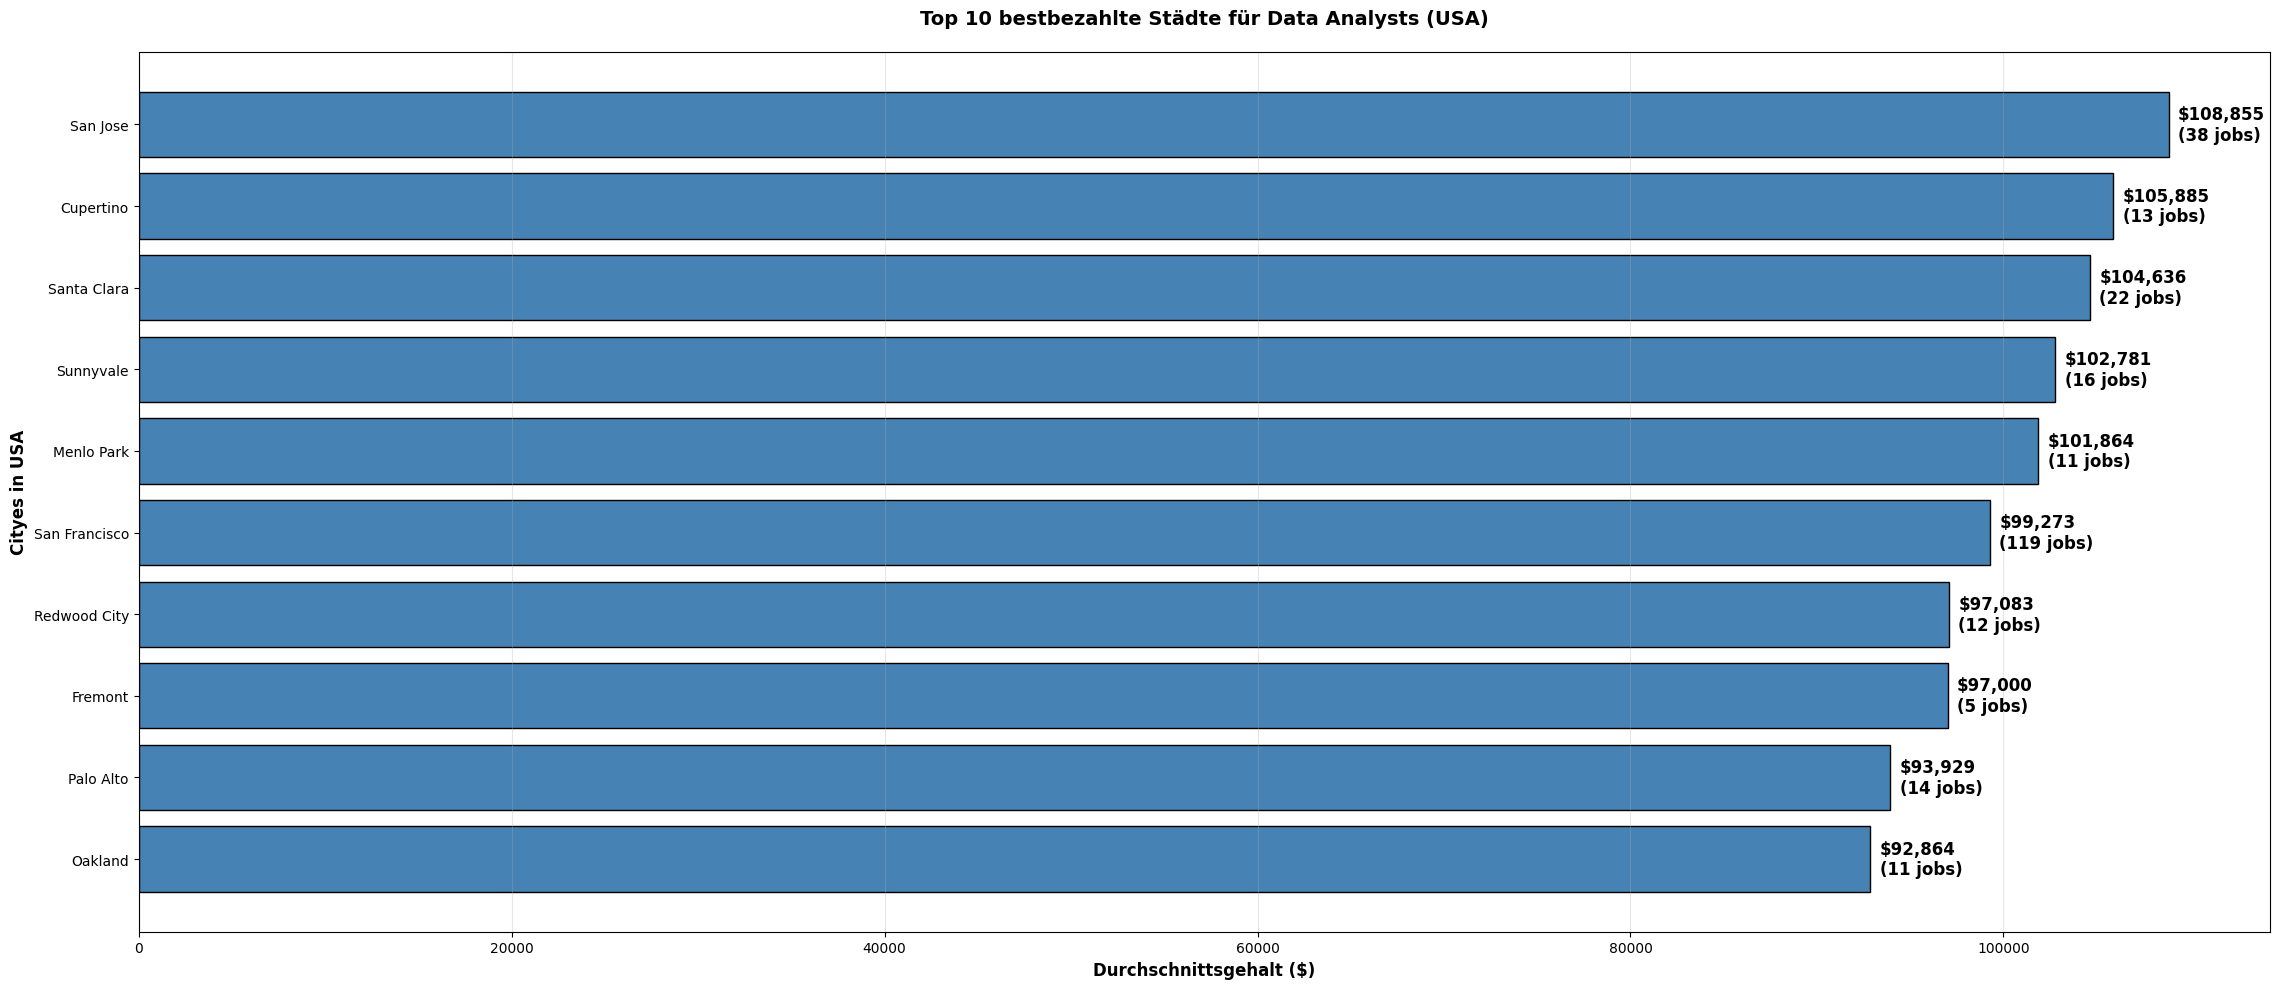


✅ Grafik gespeichert als 'top_10_cities_salary.png'


In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

# Erstelle Balkendiagramm
plt.figure(figsize=(23, 10))

# Daten vorbereiten
best_cities = top_10_cities.index.tolist()
best_salaries = top_10_cities['Avg_Salary'].values
job_counts = top_10_cities['Job_Count'].values

# Balkendiagramm
bars = plt.barh(best_cities, best_salaries, color='steelblue', edgecolor='black')

# Jobnummer als Text hinzufügen
for i, (bar, count, salary) in enumerate(zip(bars, job_counts, best_salaries)):
    plt.text(salary + 500, i, f'${salary:,.0f}\n({int(count)} jobs)', 
             va='center', fontsize=12, fontweight='bold')

plt.xlabel('Durchschnittsgehalt ($)', fontsize=12, fontweight='bold')
plt.ylabel('Cityes in USA', fontsize=12, fontweight='bold')

plt.title('Top 10 bestbezahlte Städte für Data Analysts (USA)', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.gca().invert_yaxis()  # Höchste oben

plt.savefig('top_10_cities_salary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Grafik gespeichert als 'top_10_cities_salary.png'")

In [ ]:
# Calkullating the last 10 payed citys

worst_10_cities = city_salary.tail(10)

# Print LAST 10
print("\n" + "="*80)
print("WARST 10 BEZAHLTE STÄDTE (min. 5 Jobs):")
print("="*80)
print(last_10_cities)  


WARST 10 BESTBEZAHLTE STÄDTE (min. 5 Jobs):
                Avg_Salary  Job_Count
City                                 
Pasadena           56500.0          9
Horsham            56062.0          8
Jacksonville       56000.0         19
Arlington          54625.0          8
Dallas             50576.0         66
Indianapolis       47500.0         17
Columbus           45379.0         29
Gainesville        42000.0          7
Lehi               38200.0          5
Salt Lake City     37659.0         22


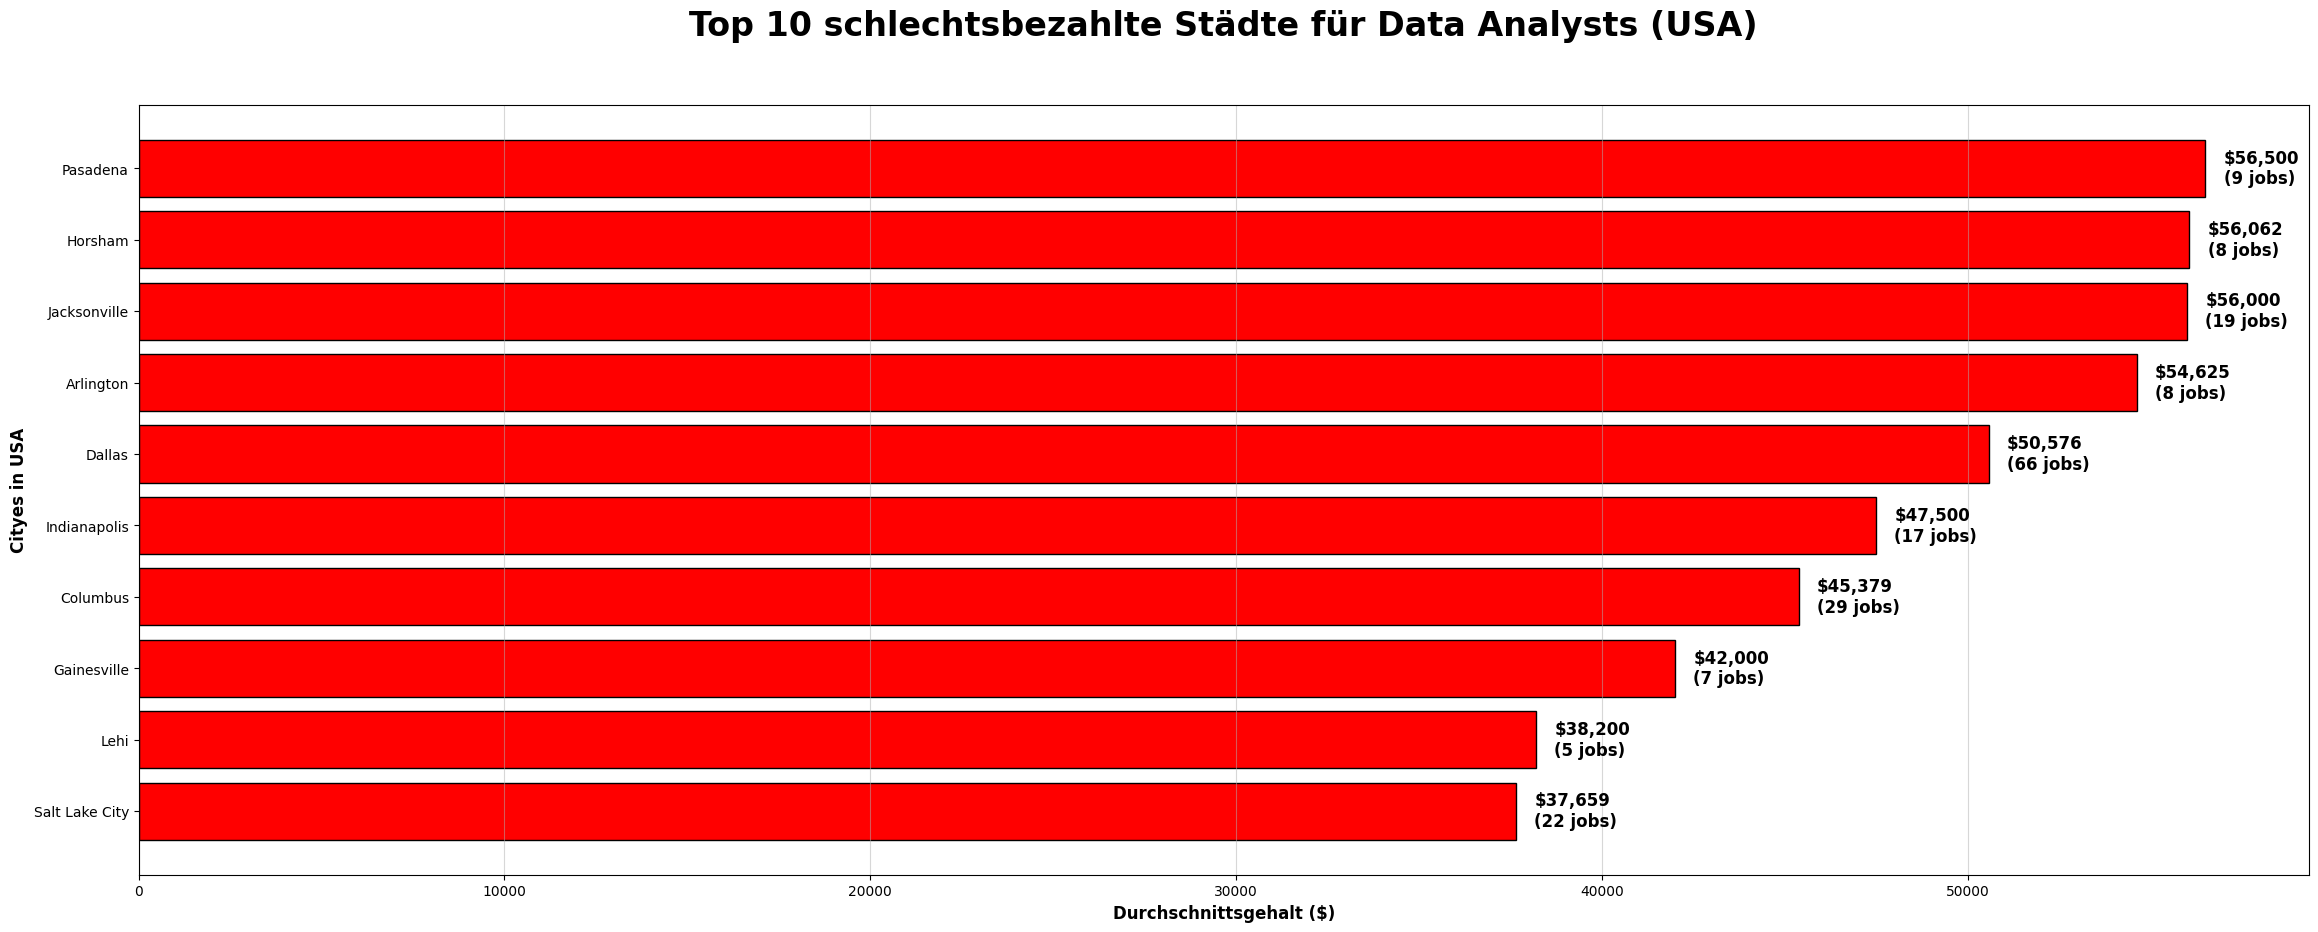

In [259]:
# Erstelle Balkendiagramm
plt.figure(figsize=(28, 10))

# Daten vorbereiten
warst_cities = worst_10_cities.index.tolist()
warst_salaries = worst_10_cities['Avg_Salary'].values
job_counts = worst_10_cities['Job_Count'].values


# Balkendiagramm
bars = plt.barh(warst_cities, warst_salaries, color='red', edgecolor='black')


# Jobnummer als Text hinzufügen
for i, (bar, count, salary) in enumerate(zip(bars, job_counts, warst_salaries)):
    plt.text(salary + 500, i, f'${salary:,.0f}\n({int(count)} jobs)', 
             va='center', fontsize=12, fontweight='bold')

plt.title('Top 10 schlechtsbezahlte Städte für Data Analysts (USA)', fontsize=24, fontweight='bold', pad=50, y=1.0)    

plt.xlabel('Durchschnittsgehalt ($)', fontsize=12, fontweight='bold')
plt.ylabel('Cityes in USA', fontsize=12, fontweight='bold')

plt.grid(axis='x', alpha=0.5 )

plt.gca().invert_yaxis()  # Höchste oben

plt.savefig('low_10_cities_salary.png', dpi=300, bbox_inches='tight')

plt.show()


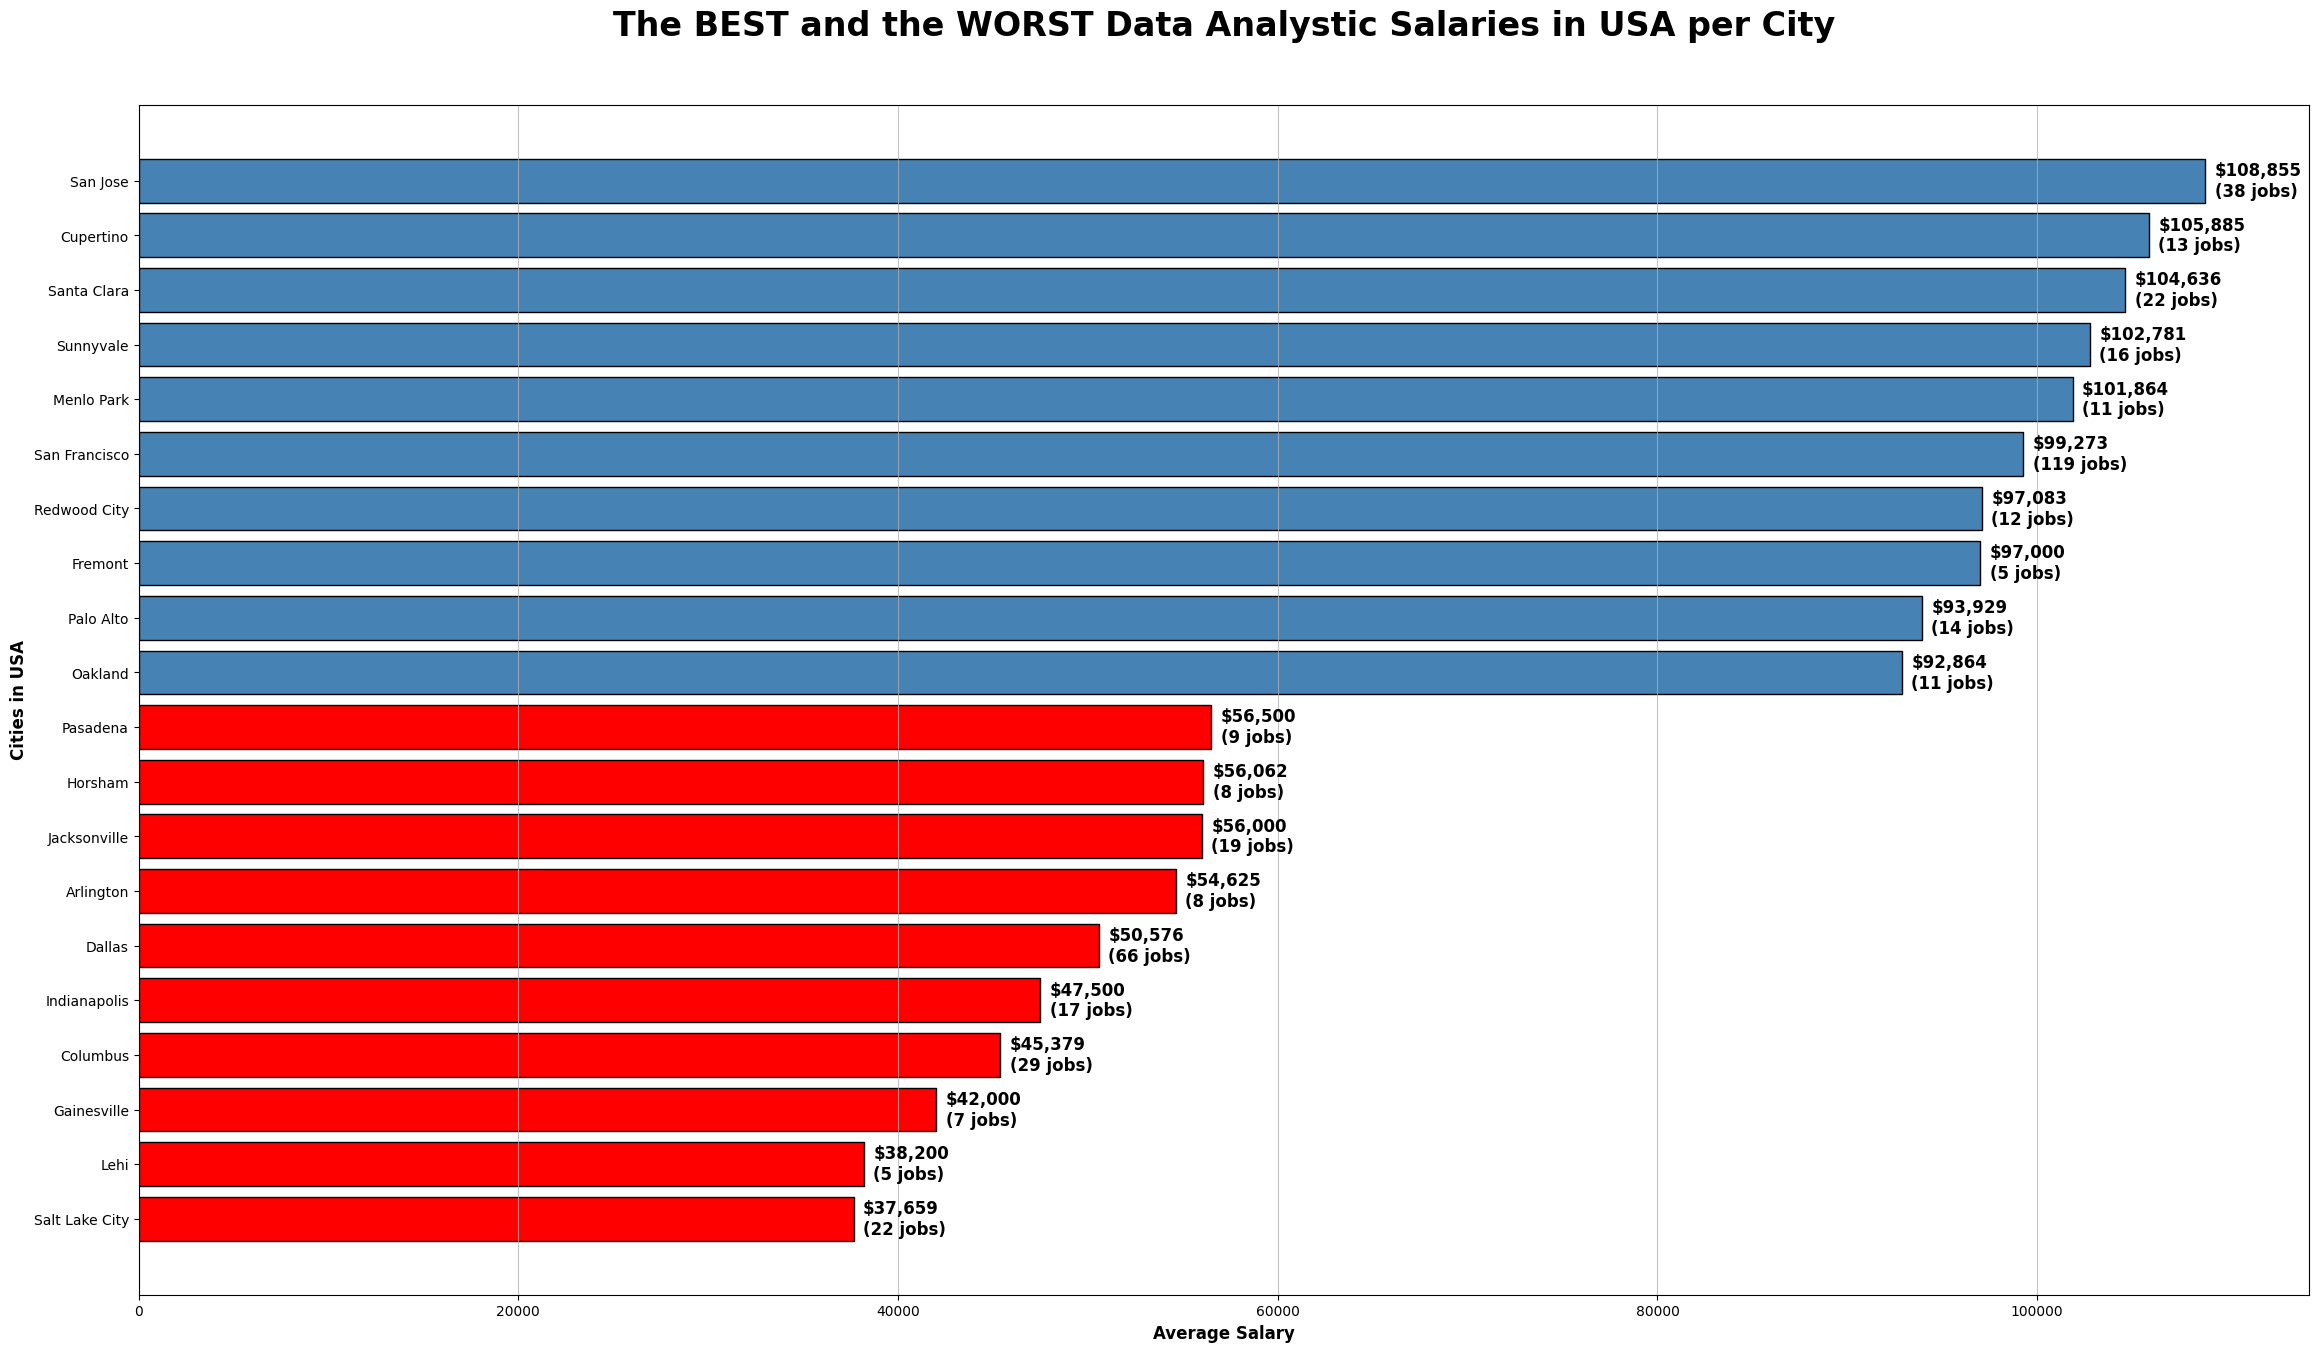

In [260]:
# Shaw the best and the worst citeys in one diagram 
plt.figure(figsize=(28, 10))
plt.subplots_adjust(top=1.3)

#Data
# best_worst_cities = best_cities + worst_10_cities
df_best_and_worst_cities = pd.concat([top_10_cities, worst_10_cities])

best_and_worst_cities = df_best_and_worst_cities.index.tolist()
best_and_worst_salaries = df_best_and_worst_cities['Avg_Salary'].values
best_and_worst_job_counts = df_best_and_worst_cities['Job_Count'].values

# Farbe pro Bar definieren
colors = ['red' if i >= 10 else 'steelblue' for i in range(len(best_and_worst_cities))]

# Balkendiagramm
bars = plt.barh(best_and_worst_cities, best_and_worst_salaries, color=colors, edgecolor='black')

# Jobnummer als Text hinzufügen
for i, (bar, count, salary) in enumerate(zip(bars, best_and_worst_job_counts, best_and_worst_salaries)):
    plt.text(salary + 500, i, f'${salary:,.0f}\n({int(count)} jobs)', 
             va='center', fontsize=12, fontweight='bold')


plt.title('The BEST and the WORST Data Analystic Salaries in USA per City', fontsize='24', fontweight='bold', pad=50, y=1)

plt.xlabel('Average Salary', fontsize = "12", fontweight='bold')
plt.ylabel('Cities in USA', fontsize = "12", fontweight='bold')

plt.grid(axis='x', alpha=0.75)

plt.gca().invert_yaxis()

plt.show()


In [304]:
# Compare the city with the best and warst salary in USA

# best_worst_cities = best_cities + worst_10_cities

top_city_name = top_10_cities.index[0]
top_city_salary = top_10_cities['Avg_Salary'].max()
# top_city_job_counts = top_10_cities[top_city_name]

worst_city_name = worst_10_cities.index[9]
worst_city_salary = worst_10_cities['Avg_Salary'].min()

procent = (worst_city_salary / top_city_salary) * 100
procent = round(procent, 2)

print("-"*90)
print("Compare the best and the worst cities in the USA ")
print("-"*90)
print('The best salaries for data analyst in USA are in ' + top_city_name + ' with salarie of ' + top_city_salary.astype('str') + '.')
print('The worst salaries for data analyst in USA are in ' + worst_city_name + ' with salarie of ' + worst_city_salary.astype('str') + '.')
print('The salary in' + worst_city_name +' is '  +  procent.astype('str') + '% from the salarie of the best salary city - ' + top_city_name + '.')



------------------------------------------------------------------------------------------
Compare the best and the worst cities in the USA 
------------------------------------------------------------------------------------------
The best salaries for data analyst in USA are in San Jose with salarie of 108855.0.
The worst salaries for data analyst in USA are in Salt Lake City with salarie of 37659.0.
The salary inSalt Lake City is 34.6% from the salarie of the best salary city - San Jose.


1.4 Skills Requirements

1.4.1 Skills aus Job Descriptions extrahieren

In [306]:
# Liste der wichtigsten Data Analyst Skills
data_skills = {
    # Programming
    'python': 'Python',
    'r programming|\\br\\b': 'R',
    'sql': 'SQL',
    'sas': 'SAS',
    'java': 'Java',
    
    # Visualisierung
    'tableau': 'Tableau',
    'power bi|powerbi': 'Power BI',
    'looker': 'Looker',
    'qlik': 'Qlik',
    
    # Python Libraries
    'pandas': 'Pandas',
    'numpy': 'NumPy',
    'matplotlib': 'Matplotlib',
    'seaborn': 'Seaborn',
    'plotly': 'Plotly',
    
    # Datenbanken
    'mysql': 'MySQL',
    'postgresql|postgres': 'PostgreSQL',
    'mongodb': 'MongoDB',
    'oracle': 'Oracle',
    
    # Cloud & Big Data
    'aws': 'AWS',
    'azure': 'Azure',
    'gcp|google cloud': 'Google Cloud',
    'hadoop': 'Hadoop',
    'spark': 'Spark',
    
    # Tools
    'excel': 'Excel',
    'google analytics': 'Google Analytics',
    'git': 'Git',
    'jupyter': 'Jupyter',
    
    # Statistik & ML
    'machine learning|\\bml\\b': 'Machine Learning',
    'statistics|statistical': 'Statistics',
    'data mining': 'Data Mining',
    'predictive modeling': 'Predictive Modeling',
    'a/b testing|ab testing': 'A/B Testing'
}

# Funktion zum Zählen
# Zählt wie oft jeder Skill in den Job Descriptions vorkommt
def count_skills(job_descriptions):

    skill_counts = {}
    
    for pattern, skill_name in data_skills.items():
        # Zähle in wie vielen Jobs der Skill vorkommt
        count = job_descriptions.str.contains(pattern, case=False, na=False, regex=True).sum()
        if count > 0:
            skill_counts[skill_name] = count
    
    return skill_counts

# Skills zählen
print("Analysiere Skills in Job Descriptions...")
skill_counts = count_skills(df_usa_cleaned['Job Description'])

# Als DataFrame
skills_df = pd.DataFrame.from_dict(skill_counts, orient='index', columns=['Count'])
skills_df['Percentage'] = (skills_df['Count'] / len(df_usa_cleaned) * 100).round(1)
skills_df = skills_df.sort_values('Count', ascending=False)

print("\n" + "="*80)
print("TOP 20 GEFRAGTE SKILLS:")
print("="*80)
print(skills_df.head(20))

Analysiere Skills in Job Descriptions...

TOP 20 GEFRAGTE SKILLS:
                  Count  Percentage
SQL                1389        61.7
Excel              1354        60.1
Statistics          839        37.2
Python              637        28.3
Tableau             620        27.5
R                   464        20.6
SAS                 411        18.2
Git                 298        13.2
AWS                 275        12.2
Data Mining         257        11.4
Power BI            248        11.0
Oracle              246        10.9
Java                204         9.1
Machine Learning    192         8.5
Hadoop              136         6.0
Looker              108         4.8
Spark                89         4.0
MySQL                82         3.6
Qlik                 76         3.4
Azure                64         2.8
